<!--
模板使用方法：将此代码块转为Markdown块然后点击左侧三角渲染（依赖 jupyter-wysiwyg ）
模板参数说明：将超链接的路径替换即可
@hyperlink_1: href="https://github.com/{组织或用户}/{仓库}/blob/{分支}/{目录和文件名组成的路径}"
@hyperlink_2: href="https://nbviewer.org/github/{组织或用户}/{仓库}/blob/{分支}/{目录和文件名组成的路径}"
注意事项：在 <p>...</p> 中添加注释或者空行等行为会破坏渲染效果
-->

<!-- start of template header -->
<p>
<div style="display:flex">
<a alt="hyperlink_1" title="在Github查看当前文件" href="https://github.com/Soltus/learn-python-BI/blob/main/lesson1/%E5%A4%A7%E6%95%B0%E6%8D%AE%E6%8A%80%E6%9C%AF%E8%AF%BE%E5%86%85%E5%AE%9E%E9%AA%8C/%E5%AE%9E%E9%AA%8C%E4%BA%8C-NumPy%E7%BB%83%E4%B9%A0.ipynb" target="_blank"><img src="https://img.shields.io/badge/File-black?logo=github" style="height: 38px"/></a>
<span style="width:5.8px"></span>
<a alt="hyperlink_2" title="在nbviewer查看当前文件" href="https://nbviewer.org/github/Soltus/learn-python-BI/blob/main/lesson1/%E5%A4%A7%E6%95%B0%E6%8D%AE%E6%8A%80%E6%9C%AF%E8%AF%BE%E5%86%85%E5%AE%9E%E9%AA%8C/%E5%AE%9E%E9%AA%8C%E4%BA%8C-NumPy%E7%BB%83%E4%B9%A0.ipynb" target="_blank"><img src="https://img.shields.io/badge/nbviewer-white?logo=jupyter" style="height: 38px"/></a>
</div>
</p>

<!-- 避免二次渲染当前块 -->
<!-- 请勿在此处添加内容 -->
<!-- end of template header -->

<p><span style="font-size: 14pt;"><code>np.matmul</code> 求两个数组的矩阵乘积 <a href="https://numpy.org/doc/stable/reference/generated/numpy.matmul.html" target="_blank" rel="noopener">ref</a></span></p>
<p><span style="font-size: 14pt;"><code>np.linalg.inv</code> 计算矩阵的（乘法）逆运算 <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html" target="_blank" rel="noopener">ref</a></span></p>

<h2 class="MsoNormal"><span class="15" style="font-family: 'Times New Roman'; font-size: 24pt; color: #b96ad9;">题一</span></h2>
<blockquote><span class="15" style="font-family: 'Times New Roman'; font-size: 12pt;">用单纯形法求解以下线性规划问题：</span></blockquote>

$$\max z=50x_1+100x_2$$ $$s.t.\qquad\begin{split}x_1+x_2\leq300\\2x_1+x_2\leq400\\x_2\leq250\\x_1,x_2\geq0\end{split}$$

<h2>（1）首先化为标准形式，声明变量且赋值为Numpy对象：</h2>

<p>$$\min z=-50x_1-100x_2$$ $$s.t.\qquad\begin{split}x_1+x_2+x_3=300\\2x_1+x_2+x_4=400\\x_2+x_5=250\\x_1,x_2,x_3,x_4,x_5\geq0\end{split}$$</p>

In [3]:
import numpy as np # 使用 np 作为别名

# 使用 reshape 函数时，指定 -1 ，Numpy会根据剩下的维度计算出数组的另外一个 shape 属性值
t1_c = np.array([-50, -100, 0, 0, 0]).reshape(-1, 1)
t1_A = np.array([[1, 1, 1, 0, 0], [2, 1, 0, 1, 0],[0, 1, 0, 0, 1]])
t1_b = np.array([300, 400, 250]).reshape(-1, 1)

<h2>（2）接着定义求解函数 <code>simplex</code>：</h2>

In [6]:
import numpy as np
def simplex(c,A,b):
    ''' 求解函数
    A：表示线性规划的系数矩阵。
    b：表示线性规划的等式约束的右侧常数。
    c：表示线性规划的目标函数系数。
    '''
    np.seterr(divide='ignore', invalid='ignore')  # 消除被除数为0的警告

    m, n = A.shape  # 约束条件的数量和变量的数量
    # 当输入的c,A,b有缺失值时，输出错误原因，函数执行结束
    if c.shape[0] != n:
        print("A和c形状不匹配")
        return -1
    if b.shape[0] != m:
        print("A和b形状不匹配")
        return -2
    num=n-m # num 表示非基变量的个数
    N_indexs=np.arange(0,num) # 非基变量的下标索引
    B_indexs=np.arange(num,n) # 基变量的下标索引
    # 初始化非基变量的矩阵 N 和基变量的矩阵 B
    N=A[:,N_indexs]
    B=A[:,B_indexs]
    # c_N 和 c_B 分别表示非基变量和基变量对应的目标函数系数向量。x_B 表示基变量对应的解向量。
    c_N=c[N_indexs,:]
    c_B=c[B_indexs,:]
    x_B = np.matmul(np.linalg.inv(B), b)
    i=0 # 初始化计数器 i
    while 1:
        # 判断 r 值是否 >=0，若 r 的每一维都 >=0，则满足最优化条件。
        # 若 r 中有值 <0，则继续寻找最优点。
        R=(c_N.T - np.matmul(np.matmul(c_B.T, np.linalg.inv(B)), N)).flatten()
        if all(R >= 0):
            print("="*6,"找到最优点","="*6)
            print("非基变量的索引为",N_indexs)
            print("基变量的索引为",B_indexs)
            # 构造最优解
            solution = {f"x{i+1}": 0 for i in range(n)}
            for i in B_indexs:
                solution[f"x{i+1}"] = x_B.flatten()[list(B_indexs).index(i)]
            return -z.flatten()[0], solution
        else:
            i=i+1
            print("step",i)
            # 找到入基变量
            N_in_index = np.argmin(R)  # 找到入基变量的下标
            N_in=N[:,N_in_index] # 入基变量对应的 Aq
            # 找到出基变量
            negd=np.matmul(np.linalg.inv(B),N_in)
            y=x_B.flatten()/negd
            # 设置一个初值索引index，需满足negd[index]>0
            for i in range(len(y)):
                if negd[i]>0:
                    index=i
                    break
            # 找到 y 最小且 negd>0 的位置
            for i in range(len(y)):
                if negd[i]<=0:
                    continue
                elif y[i]<y[index]:
                    index=i
            B_out_index=index # 找到出基变量的下标
            B_out=B[:,B_out_index] # 出基变量对应的Aq
            # 出入基变量交换位置
            in_index=N_indexs[N_in_index]
            out_index=B_indexs[B_out_index]
            temp=N_indexs[N_in_index]
            N_indexs[N_in_index]=B_indexs[B_out_index]
            B_indexs[B_out_index]=temp
            N[:,N_in_index]=B_out
            B[:,B_out_index]=N_in
            c_N = c[N_indexs, :]
            c_B = c[B_indexs, :]
            N = A[:, N_indexs]
            B = A[:, B_indexs]
            x_B = np.matmul(np.linalg.inv(B), b)
            z = np.matmul(c_B.T, x_B)
            print("出基变量索引",out_index)
            print("入基变量索引",in_index)
            print("值为",-z.flatten()[0])


<h2>（3）最后使用函数求解问题：</h2>

In [7]:
z,sol=simplex(t1_c,t1_A,t1_b)
print(f"最优值为 {z:.2f}")
print("最优解为：")
for k, v in sol.items():
    print(f"{k} = {v:.2f}")

step 1
出基变量索引 4
入基变量索引 1
值为 25000.0
step 3
出基变量索引 2
入基变量索引 0
值为 27500.0
====== 找到最优点 ======
非基变量的索引为 [2 4]
基变量的索引为 [0 3 1]
最优值为 27500.00
最优解为：
x1 = 50.00
x2 = 250.00
x3 = 0.00
x4 = 50.00
x5 = 0.00


<h1><span class="15" style="font-family: 'Times New Roman'; font-size: 24pt; color: #b96ad9;">题二</span></h1>
<blockquote><span class="15" style="font-family: 'Times New Roman'; font-size: 12pt;">求下列矩阵的逆矩阵</span></blockquote>
<p><span class="15" style="font-family: 'Times New Roman'; font-size: 12pt;"><span style="font-family: 'Microsoft YaHei'; font-size: medium;">$$Array_1=np.array([1,1,1],[0,2,5],[2,5,-1])$$</span></span></p>
<p>&nbsp;</p>

In [148]:
def matrix_inverse(matrix):
    n = len(matrix)
    aug_matrix = np.concatenate((matrix, np.identity(n)), axis=1)
    for i in range(n):
        # 对角线上的元素设为 1
        div = aug_matrix[i][i]
        aug_matrix[i] /= div
        # 用消元法将列变为单位矩阵
        for j in range(n):
            if i != j:
                sub = aug_matrix[j][i]
                aug_matrix[j] -= sub * aug_matrix[i]
    return aug_matrix[:, n:]


In [209]:
import numpy as np
t2_matrix = np.array([[1,1,1],[0,2,5],[2,5,-1]])
t2_inverse = matrix_inverse(t2_matrix)
t2_inverse2 = np.linalg.inv(t2_matrix) # 验证计算结果是否正确
print(t2_inverse, "\n\n", t2_inverse2, "\n\n")

[[ 1.28571429 -0.28571429 -0.14285714]
 [-0.47619048  0.14285714  0.23809524]
 [ 0.19047619  0.14285714 -0.0952381 ]] 

 [[ 1.28571429 -0.28571429 -0.14285714]
 [-0.47619048  0.14285714  0.23809524]
 [ 0.19047619  0.14285714 -0.0952381 ]] 




<h1><span style="color: #b96ad9;">题三</span></h1>
<blockquote>
<p>使用Numpy数组对象，创建两个3*3的矩阵，并计算矩阵乘积。</p>
</blockquote>

<p><span style="font-size: 14pt;"><code>np.dot</code> 和 <code>np.matmul</code> 都是矩阵乘法，在矢量乘矢量的內积运算中没有区别，但是 <code>np.matmul</code> 无法用于标量与array相乘。在两个 array 的维度均 <span style="color: #169179;"><span style="color: #f1c40f;">n&gt;2</span> </span>的情况下， <code>np.matmul()</code> 是对应位置的矩阵分别作点积，而 <code>np.dot()</code> 是 arrayA 的所有矩阵都与 arrayB 的所有矩阵作点积。</span></p>

In [217]:
import numpy as np

def myMatmul(a, b):
    ''' 使用教材的方式实现两个数组的矩阵乘积'''
    kk = []
    for i in range(a.shape[0]): # shape[0]代表行数
        k = []
        for j in range(b.shape[1]): # shape[1]代表列数
            k.append(sum(a[i,...]*b[...,j]))
        kk.append(k)
    return np.array(kk)

# 创建两个3*3的矩阵
t3_matrix1 = np.random.randint(-1, 3, (3,3))
t3_matrix2 = np.random.randint(-1, 6, (3,3))
print(t3_matrix1, "\n\n", t3_matrix2)
print("\n","*"*10,"\n")

# 计算矩阵乘积
matrix_product = np.dot(t3_matrix1, t3_matrix2)
matrix_product2 = myMatmul(t3_matrix1, t3_matrix2)

print(matrix_product) # 输出结果
print()
print(matrix_product2) # 输出结果是一样的

[[ 2  1  0]
 [ 2 -1  2]
 [ 2 -1 -1]] 

 [[ 0  2  5]
 [-1  1  1]
 [ 4  1  3]]

 ********** 

[[-1  5 11]
 [ 9  5 15]
 [-3  2  6]]

[[-1  5 11]
 [ 9  5 15]
 [-3  2  6]]


<h1><span style="color: #b96ad9;">题四</span></h1>
<blockquote>
<p>计算 $1+1/3+1/5+1/7+\quad ... \quad +1/99$ 的和。</p>
</blockquote>

In [45]:
import numpy as np

# 生成从1到99的奇数序列
t4_odd_nums = np.arange(1, 100, 2)
# print(odd_nums)

# 计算奇数序列的倒数并相加
# t4_sum = np.sum(1.0/t4_odd_nums)
t4_sum = 0
for i in t4_odd_nums:
    t4_sum += 1.0/i

print(f"和为: {t4_sum:.4f}")

和为: 2.9378


<h1><span style="color: #b96ad9;">题五</span></h1>
<blockquote>
<p>对一个 5 &times; 5 的随机矩阵做归一化（可选择不同归一化方法）。</p>
</blockquote>

<p><span style="font-size: 18pt;">最值归一化 (Min-Max Scaling) 公式： </span></p>
<p>$$x^{\prime}={{x-\min(x)} \over {\max(x)-\min(x)}}$$</p>
<p>&nbsp;</p>
<p><span style="font-size: 18pt;">Z-Score标准化 (均值方差归一化)&nbsp;公式：</span></p>
<p>$$x^{\prime}={{x-\mu} \over {\sigma}}$$</p>

In [96]:
import numpy as np
import matplotlib.pyplot as plt


# 最值归一化
def min_max_scaling(X):
    '''
    最值归一化是一种简单的归一化方法，它将数值缩放到指定的范围内，通常是 [0, 1] 或 [-1, 1]。
    '''
    X_norm = (X - np.min(X)) / (np.max(X) - np.min(X))
    return X_norm

# 均值方差归一化
def standardization(X):
    '''
    Z-Score标准化(均值方差归一化)：将原始数据映射到均值为0、标准差为1的分布上
    '''
    X_norm = (X - np.mean(X)) / np.std(X)
    return X_norm


<p style="text-align: center;"><span style="font-size: 18pt;">情景一</span></p>



原始矩阵：
[[ 7 -1  0  1 -1]
 [ 4  6  0  8  8]
 [ 7  8  8  0 -7]
 [-1  0 -8 -4 -1]
 [-8 -4 -6 -5 -6]]


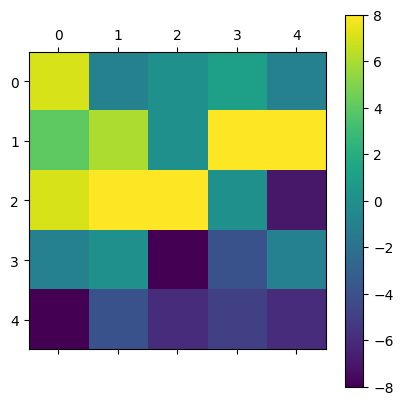



最值归一化后的矩阵：


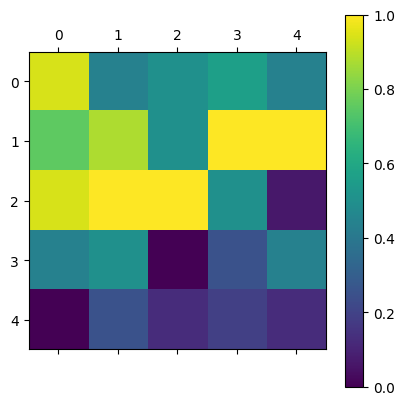



均值方差归一化后的矩阵：


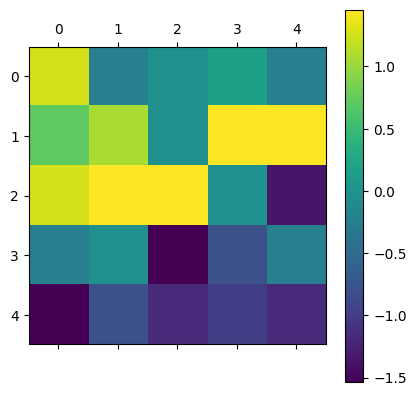

In [139]:
# 5 × 5 的随机矩阵
X = np.random.randint(-9, 9, (5,5))
Y = min_max_scaling(X) # 最值归一化
Z = standardization(X) # 均值方差归一化
# 打印原始矩阵和归一化后的矩阵
print("\n\n原始矩阵：")
print(X)
plt.matshow(X)
plt.colorbar(shrink=1) # colorbar大小
plt.show()

print("\n\n最值归一化后的矩阵：")
plt.matshow(Y)
plt.colorbar(shrink=1) # colorbar大小
plt.show()

print("\n\n均值方差归一化后的矩阵：")
plt.matshow(Z)
plt.colorbar(shrink=1) # colorbar大小
plt.show()

print("\n\n")

<p style="text-align: center;"><span style="font-size: 18pt;">情景二</span></p>



原始矩阵：
[[    8    -1    -7    -5 -9999]
 [   -8     4     2     3     0]
 [   -4    -8    -7     6     0]
 [    0     0    -2    -5     0]
 [    2    -8    -5    -8  9999]]


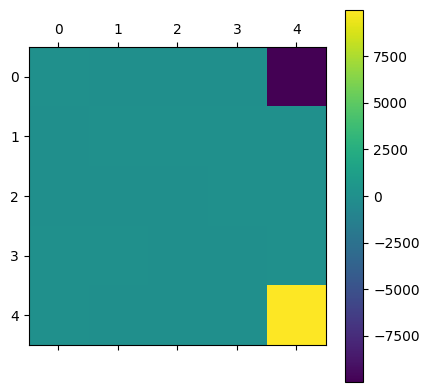



最值归一化后的矩阵：


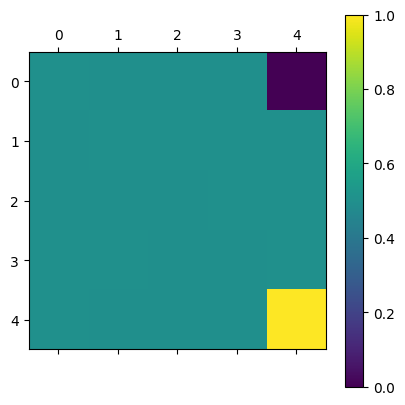



均值方差归一化后的矩阵：


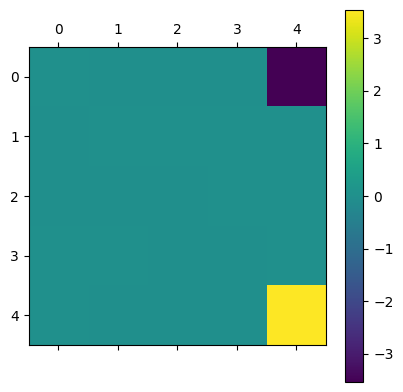

In [144]:
# 5 × 5 的随机矩阵（插入极值）
X2 = np.random.randint(-9, 9, (5,4))
X2 = np.append(X2, values=np.array([-9999,0,0,0,9999]).reshape(-1,1), axis=1) # 根据行追加
Y2 = min_max_scaling(X2) # 最值归一化
Z2 = standardization(X2) # 均值方差归一化
# 打印原始矩阵和归一化后的矩阵
print("\n\n原始矩阵：")
print(X2)
plt.matshow(X2)
plt.colorbar(shrink=1) # colorbar大小
plt.show()

print("\n\n最值归一化后的矩阵：")
plt.matshow(Y2)
plt.colorbar(shrink=1) # colorbar大小
plt.show()

print("\n\n均值方差归一化后的矩阵：")
plt.matshow(Z2)
plt.colorbar(shrink=1) # colorbar大小
plt.show()

print("\n\n")

<p><span style="font-size: 14pt;">使用归一化来缩放数据，则数据将更集中在均值附近。这是由于归一化的缩放是&ldquo;拍扁&rdquo;统一到区间（仅由极值决定），而标准化的缩放是更加&ldquo;弹性&rdquo;和&ldquo;动态&rdquo;的，和整体样本的分布有很大的关系。所以归一化不能很好地处理离群值，而标准化对异常值的鲁棒性强，在许多情况下，它优于归一化。<strong><span style="color: #e03e2d;">我还不知道怎么体现归一化的这一特点</span></strong>💔</span></p>
<p><span style="font-size: 14pt;"> 1）需要使用梯度下降和计算距离的模型要做归一化，因为不做归一化会使收敛的路径程z字型下降，导致收敛路径太慢，而且不容易找到最优解，归一化之后加快了梯度下降求最优解的速度，并有可能提高精度。如下图所示（右侧为归一化后）：</span></p>
<p><span style="font-size: 14pt;">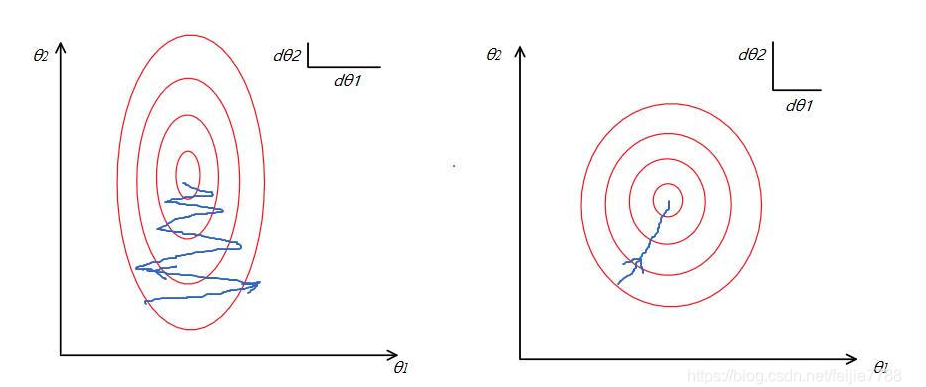</span></p>
<p><span style="font-size: 14pt;"> 2）概率模型、树形结构模型不需要归一化，因为它们不关心变量的值，而是关心变量的分布和变量之间的条件概率，如决策树、随机森林。</span></p>
<p>&nbsp;</p>
<p>&nbsp;</p>

<h1><span style="color: #b96ad9;">题六</span></h1>
<blockquote>
<p>选取三种排序算法（冒泡排序除外），对列表排序。</p>
</blockquote>

In [14]:
import numpy as np

def quick_sort(arr):
    '''快速排序（QuickSort）'''
    # 将数组分成小于枢轴值和大于等于枢轴值的两部分，并对这两部分进行排序。这个函数使用 NumPy 的 np.concatenate 函数来连接这两部分，最后返回完整的已排序数组。
    if len(arr) <= 1:
        # 长度为 1 或 0 的数组不需要排序
        return arr
    pivot = arr[0] # 取数组的第一个元素作为枢轴值
    left = np.array([x for x in arr[1:] if x < pivot]) # 将数组分成小于枢轴值的部分，使用列表推导式筛选小于枢轴值的元素，并使用 np.array 将其转化为 NumPy 数组
    right = np.array([x for x in arr[1:] if x >= pivot]) # 将数组分成大于等于枢轴值的部分，使用列表推导式筛选大于等于枢轴值的元素，并使用 np.array 将其转化为 NumPy 数组
    return np.concatenate((quick_sort(left), [pivot], quick_sort(right))) # 将小于枢轴值和大于等于枢轴值的两部分分别递归地进行快速排序，并使用 np.concatenate 函数将它们连接在一起，形成已排序的数组

def merge_sort(arr):
    '''归并排序（Merge Sort）'''
    # 将数组分成两部分，对每个子数组进行排序，然后将它们合并成一个已排序的数组。这个函数使用 NumPy 的 np.empty 函数创建一个空数组，用来存储排序后的结果。然后，它使用 while 循环比较左右子数组的元素，将它们依次放入结果数组中。
    if len(arr) <= 1:
        # 长度为 1 或 0 的数组不需要排序
        return arr
    # 将输入数组分成两部分，mid 是数组的中间位置
    mid = len(arr) // 2
    # 递归调用 merge_sort 函数对左右两个子数组进行排序
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    i = j = 0 # 初始化变量 i 和 j 为 0，用于追踪左右两个子数组的元素
    result = np.empty(len(arr), dtype=arr.dtype) # 创建一个名为 result 的 NumPy 空数组，用于存储排序后的结果
    while i < len(left) and j < len(right):
        # 这是归并排序的关键部分。通过比较左右两个子数组的元素大小，将它们合并成一个有序数组。while 循环会一直执行，直到其中一个子数组的所有元素都被加入到 result 数组中。
        if left[i] < right[j]:
            result[i+j] = left[i]
            i += 1
        else:
            result[i+j] = right[j]
            j += 1
    result[i+j:] = left[i:] if i < len(left) else right[j:] # 将剩余的子数组的元素添加到 result 数组中
    return result

def heap_sort(arr):
    '''堆排序（Heap Sort）'''
    # 首先使用 sift_down 函数建立一个最大堆，然后将堆的根节点（即数组的第一个元素）与堆的最后一个节点交换，并将堆的大小减小 1 。再次使用 sift_down 函数将新的根节点移动到正确的位置。该过程重复执行，直到堆为空。
    def sift_down(arr, start, end):
        '''
        arr 是要进行堆排序的数组，start 和 end 分别表示堆排序的起始和结束位置。
        函数 sift_down 的作用是将以 start 为根的子树变成最大堆。
        '''
        root = start
        while True:
            child = 2 * root + 1
            if child > end:
                break
            if child + 1 <= end and arr[child] < arr[child + 1]:
                child += 1
            if arr[root] < arr[child]:
                arr[root], arr[child] = arr[child], arr[root]
                root = child
            else:
                break
    # Build Max-Heap
    # 该代码段使用 for 循环遍历从数组中间到起始位置的所有节点，并在每个节点上调用 sift_down 函数。由于节点是按层级从左到右排列的，因此可以使用 (len(arr)-2)//2 计算出最后一个非叶子节点的位置。
    for start in range((len(arr)-2)//2, -1, -1):
        sift_down(arr, start, len(arr)-1)
    # Heap Sort
    # 该代码段使用 for 循环遍历从结束位置到起始位置的所有节点，并在每个节点上交换堆的根节点和堆的最后一个节点。交换后，使用 sift_down 函数将新的根节点移动到正确的位置。
    for end in range(len(arr)-1, 0, -1):
        arr[0], arr[end] = arr[end], arr[0]
        sift_down(arr, 0, end-1)
    return arr


In [24]:
import random

my_list = [random.randint(1, 100) for _ in range(10)]
my_list = np.array(my_list)
print('原列表  ',my_list)

t6_s1 = quick_sort(my_list)
t6_s2 = merge_sort(my_list)
t6_s3 = heap_sort(my_list)
print('快速排序',t6_s1)
print('归并排序',t6_s2)
print('堆排序  ',t6_s3)

原列表   [ 4 44 67 66 86  8 34 31 85 48]
快速排序 [ 4.  8. 31. 34. 44. 48. 66. 67. 85. 86.]
归并排序 [ 4  8 31 34 44 48 66 67 85 86]
堆排序   [ 4  8 31 34 44 48 66 67 85 86]


<!-- start of template footer -->
<p>
<div style="display:flex">
<a href="tencent://AddContact/?fromId=45&fromSubId=1&subcmd=all&uin=694357845&website=www.oicqzone.com" target="_blank"><img title="添加QQ好友" src="https://img.shields.io/badge/QQ-694357845-blue?logo=Tencent QQ" style="height: 38px"/></a>
</div>
</p>
<!-- end of template footer -->